# PCA

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [2]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=2800929601874167bb0e9b33126bfb51e3eef7f6d1ded3ee8b102fd63861b082
  Stored in directory: c:\users\jagapriya\appdata\local\pip\cache\wheels\d5\1a\3e\6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyforest
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
df=pd.read_csv("wine.csv")
df

<IPython.core.display.Javascript object>

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [7]:
df.Type.unique()

array([1, 2, 3], dtype=int64)

In [8]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [9]:
df['ID'] = range(1, 179, 1)
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [10]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
 14  ID               178 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 21.0 KB


In [12]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


In [13]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

In [14]:
X=df.iloc[:,1:]
X

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [15]:
pca=PCA()
n_data=pca.fit_transform(X)

In [16]:
data=pd.DataFrame(n_data)
data

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,326.174153,-53.856625,22.205416,-1.387766,1.469505,0.344962,0.139648,0.382159,-0.210989,0.700512,0.052649,0.074402,-0.061605,0.085031
1,310.690755,-54.990964,-4.624767,-5.095137,-0.031095,0.572203,-0.378601,-0.396286,0.507808,0.286444,0.009247,0.025201,-0.084888,0.018942
2,444.780542,-39.376598,-6.026576,2.427837,1.332735,0.538159,0.272084,-0.999969,-0.729077,0.020915,0.039684,0.179449,-0.130743,-0.022002
3,738.175378,-6.889145,0.289871,0.838785,1.455567,-0.079667,0.581524,-0.045324,0.198199,0.055013,-0.528441,-0.113817,-0.205159,0.024159
4,-2.510043,-84.901467,19.582247,3.373926,2.664401,1.413209,-0.486449,-0.429091,-0.105065,-0.198701,-0.253318,0.228273,-0.125223,0.033643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-15.936752,83.306800,-5.633099,-1.458254,-0.184200,2.206573,0.676515,0.178072,0.113281,0.041207,-0.034864,0.033998,0.138533,0.019642
174,-5.989042,85.493307,1.212595,0.898746,-0.609045,0.484999,0.160445,0.305411,-0.192480,-0.158676,-0.091139,-0.023193,0.055144,-0.049585
175,78.745724,95.775969,17.524386,-2.619886,1.011495,0.554209,0.216668,-0.435226,0.059000,0.273923,0.077841,-0.210922,0.111346,0.031446
176,83.609119,97.243433,17.406031,-2.536593,-0.031803,-0.965636,-0.249531,0.002373,-0.051963,0.255692,0.026374,0.011983,0.012123,0.124369


In [17]:
np.round(pca.explained_variance_,4)

<IPython.core.display.Javascript object>

array([1.0032142e+05, 1.5401166e+03, 1.7230490e+02, 7.5118000e+00,
       2.9600000e+00, 9.7500000e-01, 7.6270000e-01, 2.2800000e-01,
       1.4700000e-01, 1.1210000e-01, 6.8700000e-02, 3.6900000e-02,
       1.9500000e-02, 8.2000000e-03])

In [18]:
explained_variance_ratio=pca.explained_variance_ratio_

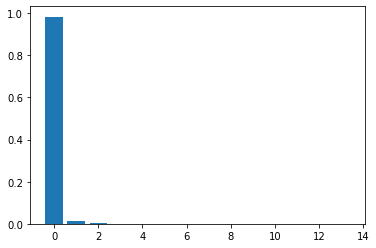

In [19]:
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio);

In [20]:
new_data=data.iloc[:,:3]
new_data=new_data.rename(columns={0:'pca1',1:'pca2',2:'pca3'})

In [21]:
new_data

,pca1,pca2,pca3
0,326.174153,-53.856625,22.205416
1,310.690755,-54.990964,-4.624767
2,444.780542,-39.376598,-6.026576
3,738.175378,-6.889145,0.289871
4,-2.510043,-84.901467,19.582247
...,...,...,...
173,-15.936752,83.306800,-5.633099
174,-5.989042,85.493307,1.212595
175,78.745724,95.775969,17.524386
176,83.609119,97.243433,17.406031


In [22]:
scalar=MinMaxScaler()
scaled_data=scalar.fit_transform(new_data)

In [23]:
scaled_data=pd.DataFrame(scaled_data)
scaled_data

<IPython.core.display.Javascript object>

,0,1,2
0,0.565147,0.170440,0.577411
1,0.554093,0.164213,0.264764
2,0.649816,0.249938,0.248429
3,0.859263,0.428298,0.322033
4,0.330508,0.000000,0.546844
...,...,...,...
173,0.320923,0.923486,0.253014
174,0.328024,0.935490,0.332786
175,0.388514,0.991943,0.522864
176,0.391986,1.000000,0.521485


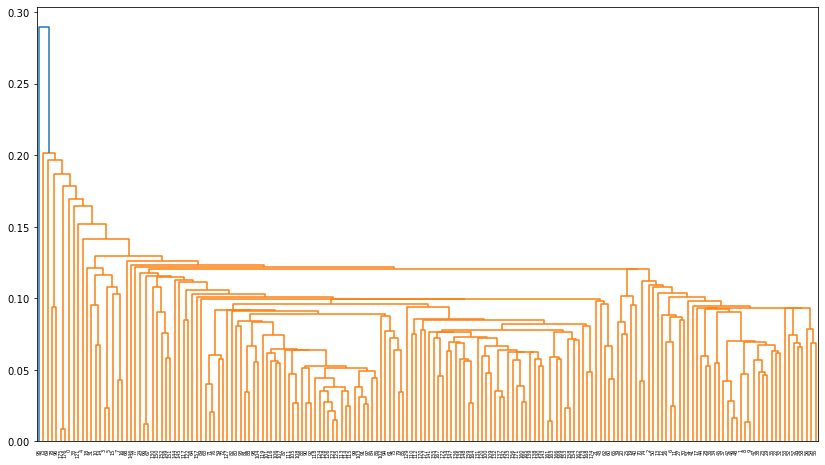

In [24]:
plt.figure(figsize=(14,8))
dendogram=sch.dendrogram(sch.linkage(scaled_data,method='single'))

In [25]:
from sklearn.metrics import silhouette_score as sil

In [26]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')
    y=hc.fit_predict(scaled_data)
    sc_score.append(sil(scaled_data,y))
print(sc_score)

[0.24399795553441014, 0.37711270981992673, 0.3941546561885778, 0.31789557631072823, 0.31391676014864955, 0.2804465738920286, 0.30207798761165205, 0.292810548261885]


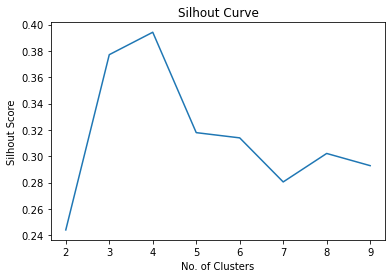

In [27]:
plt.plot(nc,sc_score)
plt.title('Silhout Curve')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhout Score')
plt.show()

In [28]:
hc=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
y_hc=hc.fit_predict(scaled_data)

scaled_data

,0,1,2
0,0.565147,0.170440,0.577411
1,0.554093,0.164213,0.264764
2,0.649816,0.249938,0.248429
3,0.859263,0.428298,0.322033
4,0.330508,0.000000,0.546844
...,...,...,...
173,0.320923,0.923486,0.253014
174,0.328024,0.935490,0.332786
175,0.388514,0.991943,0.522864
176,0.391986,1.000000,0.521485


In [29]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
score_elbow=[]
for i in nc:
    km = KMeans(n_clusters=i)
    y=km.fit_predict(scaled_data)
    sc_score.append(sil(scaled_data,y))
    score_elbow.append(km.inertia_) 
print(sc_score)
print(score_elbow)

[0.3648405267827075, 0.40558302494447346, 0.41947998561697636, 0.37987243616807087, 0.32774015229095366, 0.32105371308424446, 0.33056590465581687, 0.305274041775988]
[13.9154190264384, 8.804728383617013, 6.723807950497311, 5.777318760983927, 5.050886320743146, 4.352091330780637, 3.9170069006408648, 3.453372443888783]


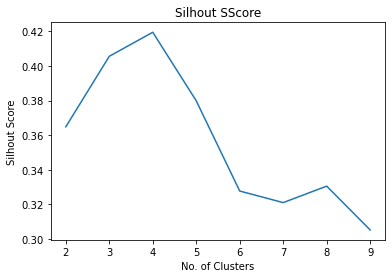

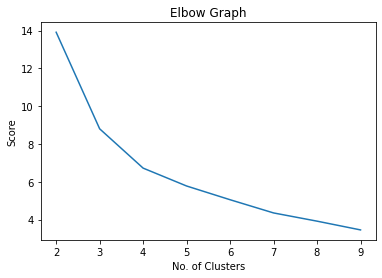

In [30]:
plt.plot(nc,sc_score)
plt.title("Silhout SScore")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhout Score")
plt.show()

plt.plot(nc,score_elbow)
plt.title("Elbow Graph")
plt.xlabel("No. of Clusters")
plt.ylabel("Score")
plt.show()

In [31]:
km = KMeans(n_clusters=3)
y_km=km.fit_predict(scaled_data)

In [32]:
dbscan=DBSCAN(eps=0.1,min_samples=2)
dbscan.fit(scaled_data)
y_db=dbscan.labels_
y_db

array([-1,  0, -1,  1, -1,  1,  2,  3,  0,  0,  4,  2,  2, -1,  4, -1,  3,
        0, -1,  5,  6,  7,  0,  0, -1,  6,  2,  2,  0,  0,  2,  4,  0, -1,
        0,  0,  0,  0,  0,  6,  5,  0,  0,  7,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  7,  7,  7,  7,  7, -1,  7,  8,  8,
       -1, -1,  9,  7,  7, -1,  9,  7,  7, -1, 10,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7, -1, 10,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 11,  7,
        7,  7, -1, 11,  7,  7,  7,  7,  7,  7,  7, -1,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7, -1, -1, -1,  7,  7, 12, 12, 12, 12,
        7,  7,  7,  7, -1,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7, 13, 13,  7], dtype=int64)

In [33]:
scaled_data['y_hc']=y_hc
scaled_data['y_km']=y_km
scaled_data['y_db']=y_db
scaled_data

,0,1,2,y_hc,y_km,y_db
0,0.565147,0.170440,0.577411,1,2,-1
1,0.554093,0.164213,0.264764,2,2,0
2,0.649816,0.249938,0.248429,2,2,-1
3,0.859263,0.428298,0.322033,2,2,1
4,0.330508,0.000000,0.546844,1,1,-1
...,...,...,...,...,...,...
173,0.320923,0.923486,0.253014,0,0,7
174,0.328024,0.935490,0.332786,0,0,7
175,0.388514,0.991943,0.522864,0,0,13
176,0.391986,1.000000,0.521485,0,0,13


In [34]:
print(scaled_data['y_hc'].value_counts())
print(scaled_data['y_km'].value_counts())
print(scaled_data['y_db'].value_counts())

0    67
1    64
2    47
Name: y_hc, dtype: int64
1    73
2    53
0    52
Name: y_km, dtype: int64
 7     95
 0     30
-1     21
 2     6 
 12    4 
 4     3 
 6     3 
 1     2 
 3     2 
 5     2 
 8     2 
 9     2 
 10    2 
 11    2 
 13    2 
Name: y_db, dtype: int64


So for Hierarchical we are getting 3 clusters,for KMeans we are getting 3 clusters and for DBSCAN we are getting 11 clusters.
